Simple quick update latest weather

In [61]:
# Tell matplotlib to plot in line
%matplotlib inline

# import pandas
import pandas

# seaborn magically adds a layer of goodness on top of Matplotlib
# mostly this is just changing matplotlib defaults, but it does also
# provide some higher level plotting methods.
import seaborn

# Tell seaborn to set things up
seaborn.set()

def smooth(data, thresh=None):
    
    means = data.mean()

    if thresh is None:
        sds = data.std()
    else:
        sds = thresh
    
    delta = data - data.shift()
    
    good = delta[abs(delta) < sds]

    #print(good.describe())
    
    return delta.where(good, 0.0)


In [62]:
infile = "../files/weather.csv"

!scp 192.168.0.127:Adafruit_Python_BMP/weather.csv ../files

weather.csv                                   100%  519KB 518.7KB/s   00:00    


In [63]:
""" assume it is csv and let pandas do magic

  index_col tells it to use the 'date' column in the data
  as the row index, plotting picks up on this and uses the
  date on the x-axis

  The *parse_dates* bit just tells it to try and figure out
  the date/time in the columne labeled 'date'.
"""
data = pandas.read_csv(infile, index_col='date', parse_dates=['date'])
#data = smooth(data)

# smooth the data to filter out bad temps and pressures
data.altitude = (smooth(data.altitude, 5.0).cumsum() + data.altitude[0])
data.temp = (smooth(data.temp, 5.0).cumsum() + data.temp[0])

### Last 24 hours:

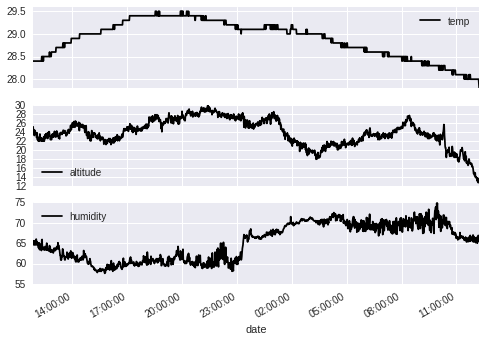

In [64]:
# reading is once a minute, so take last 24 * 60 readings
def plotem(data, n=-60):
    
    
    if n < 0:
        start = n
        end = len(data)
    else:
        start = 0
        end = n
        
    data[['temp', 'altitude', 'humidity']][n:].plot(subplots=True)
        
plotem(data, -24*60)

### Last week

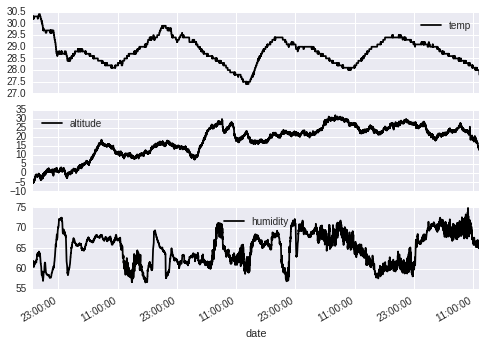

In [65]:
# reading is once a minute, so take last 7 * 24 * 60 readings
plotem(data, -7*24*60)

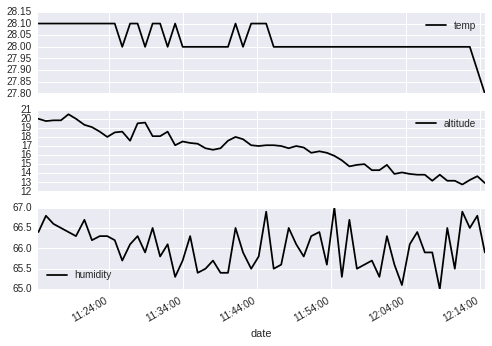

In [66]:
plotem(data)

## Look at all the data

In [67]:
data.describe()

,temp,pressure,altitude,sealevel_pressure,humidity,temp_dht
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,28.813477,101112.711654,17.925008,101110.097368,64.885940,28.631184
std,0.560779,242.891654,8.539397,102.461874,3.897795,0.563304
min,27.400000,100949.000000,-5.410146,100948.000000,56.599998,27.200001
25%,28.400000,101033.750000,12.829110,101033.000000,61.500000,28.200001
50%,28.800000,101079.000000,20.542509,101079.000000,65.500000,28.600000
75%,29.200000,101171.250000,24.338765,101170.250000,67.900002,29.000000
max,30.400000,117173.000000,31.935431,101394.000000,74.800003,30.200001


I currently have two temperature sensors:

* DHT22 sensor which gives temperature and humidity.
* BMP180 sensor which gives pressure and temperature.

The plot below shows the two temperature plots.

Both these sensors are currently in my study.  For temperature and humidity I would like to have some readings from outside.  If I can solder them to a phone jack then I can just run phone cable to where they need to be.

**Below** plots the current values from these sensors.  This is handy for calibration.

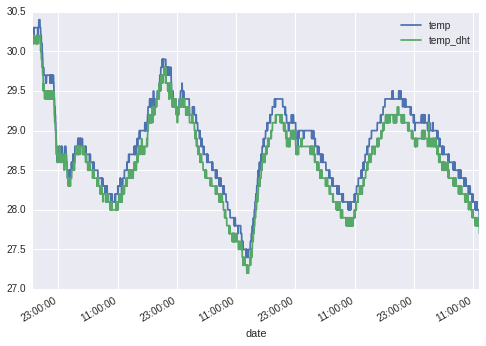

In [68]:
data[['temp', 'temp_dht']].plot()

## Dew Point

The warmer air is, the more moisture it can hold.  The *dew point* is
the temperature at which air would be totally saturated if it had as 
much moisture as it currently does. 

Given the temperature and humidity the *dew point* can be calculated, the actual formula is
pretty complex.

It is explained in more detail here: http://iridl.ldeo.columbia.edu/dochelp/QA/Basic/dewpoint.html

>If you are interested in a simpler calculation that gives an approximation of dew point temperature if you know >the observed temperature and relative humidity, the following formula was proposed in a 2005 article by Mark G. >Lawrence in the Bulletin of the American Meteorological Society:

$$Td = T - ((100 - RH)/5.)$$


In [69]:
data['dewpoint'] = data.temp - ((100. - data.humidity)/5.)

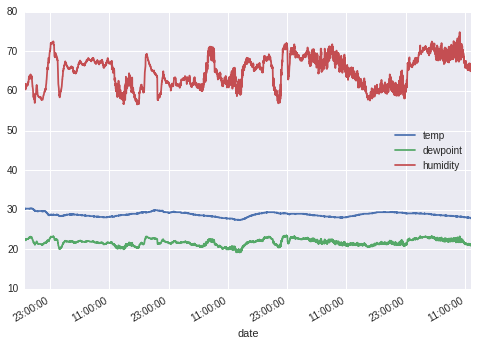

In [70]:
data[['temp', 'dewpoint', 'humidity']].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa3e8cfbe0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7ffa3e4336d8>], dtype=object)

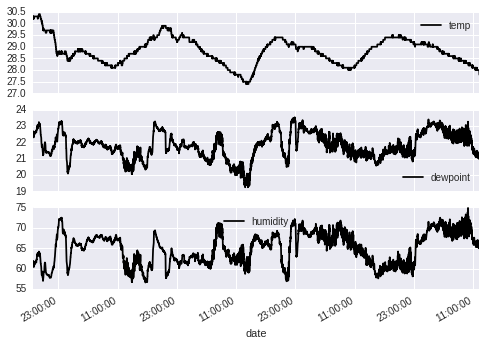

In [71]:
data[['temp', 'dewpoint', 'humidity']].plot(subplots=True)

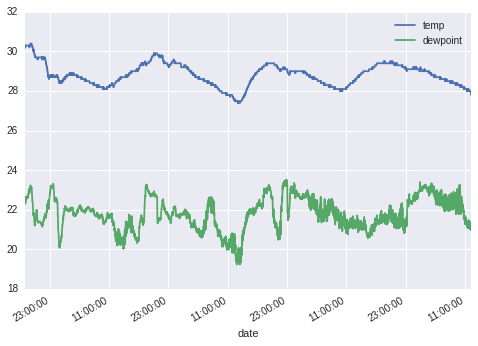

In [72]:
data[['temp', 'dewpoint']].plot()

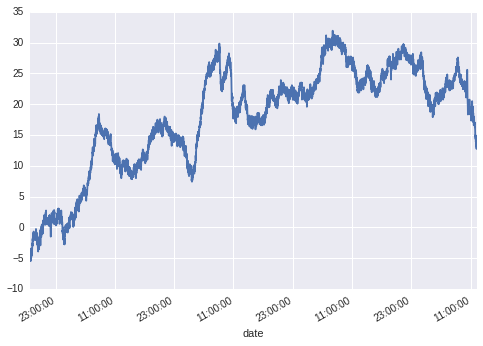

In [73]:
data.altitude.plot()